<a href="https://colab.research.google.com/github/h-e-d-g-e-h-o-g/Day-79-Nobel-Prize-Analysis/blob/main/Nobel_Prize_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [92]:
# %pip install --upgrade plotly

### Import Statements

In [91]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [ ]:
print(f'The shape of df_data is {df_data.shape}')

The shape of df_data is (962, 16)


In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
print(f"The Nobel Prize was first awarded in {df_data['year'].min()}")

The Nobel Prize was first awarded in 1901


In [ ]:
print(f"The latest year included in the dataset is {df_data['year'].max()}")

The latest year included in the dataset is 2020


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [ ]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [ ]:
print(f"Is there any NaN values? : {df_data.isna().values.any()}")

Is there any NaN values? : True


In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [ ]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


In [ ]:
df_data.loc[df_data.birth_date.isna()]
# It implies that the rows which have "NaN" value in birth_date column.
# They contain "NaN" value in organization_city, organization_name, birth_country_current" etc.
# In these records, the prizes are awarded to organization rather than individuals.

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.loc[df_data.organization_name.isna()]
# This implies that the rows which have "NaN" values in organization name column.
# They will have "NaN" values in organization_country and organization_city column.
# Prizes are received by the individuals too who are not affliated with any research instituion or organization.

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ
942,2019,Literature,The Nobel Prize in Literature 2019,“for an influential work that with linguistic ...,1/1,Individual,Peter Handke,1942-12-06,Griffen,Austria,Austria,Male,NaN,NaN,NaN,AUT
946,2019,Peace,The Nobel Peace Prize 2019,“for his efforts to achieve peace and internat...,1/1,Individual,Abiy Ahmed Ali,1976-08-15,Beshasha,Ethiopia,Ethiopia,Male,NaN,NaN,NaN,ETH
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
df_data['birth_date'] = pd.to_datetime(df_data["birth_date"])

#### Add a Column with the Prize Share as a Percentage

In [ ]:
price_share_ratio = df_data["prize_share"].astype(str).str.split("/", expand=True)
# Here, I am splitting the data of prize_share on the basis of "/".
# Then, expand=True will make the dataframe called "price_share_ratio" which has two columns each representing
# the two elements that were split on each row.
numerator = pd.to_numeric(price_share_ratio[0])
# Representing the first column
denominator = pd.to_numeric(price_share_ratio[1])
# Representing the second column
df_data["share_pct"] = (numerator / denominator)
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
nan_sex = df_data[df_data["sex"].isna()]
individual_df_data = df_data.drop(nan_sex.index)
# # px.pie(values=df_data["sex"].value_counts(), names=df_data["sex"].unique(), hole=.3)
# df_data["sex"].unique()
individual_df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Harvey J. Alter,1935-09-12,"New York, NY",United States of America,United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,USA,0.33
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25


In [ ]:
px.pie(names=individual_df_data["sex"].unique(),
       values=individual_df_data["sex"].value_counts(),
       title="Percentage of Male vs. Female Winners")

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
individual_df_data[individual_df_data["sex"] == "Female"]["full_name"].head(3)

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

In [ ]:
individual_df_data[individual_df_data["sex"] == "Female"][["full_name", "category"]].head(3)

,full_name,category
18,"Marie Curie, née Sklodowska",Physics
29,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace
51,Selma Ottilia Lovisa Lagerlöf,Literature


In [ ]:
individual_df_data[individual_df_data["sex"] == "Female"][["full_name", "category", "birth_country", "organization_name"]].head(3)

,full_name,category,birth_country,organization_name
18,"Marie Curie, née Sklodowska",Physics,Russian Empire (Poland),NaN
29,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,Austrian Empire (Czech Republic),NaN
51,Selma Ottilia Lovisa Lagerlöf,Literature,Sweden,NaN


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [ ]:
# repeat_winners_df = individual_df_data.groupby("full_name", as_index=True).agg({'full_name': pd.Series.value_counts})
# repeat_winners_df.rename(columns={'full_name': 'values'}, inplace=True)
# repeat_winners_df.sort_values('values', ascending=False)
# repeat_winners = repeat_winners_df[repeat_winners_df['values'] > 1]
# print("The people who won Noble Prizes multiple times are:- ")
# for winner in repeat_winners.index:
#   print(winner)
is_winner = df_data.duplicated(subset=["full_name"], keep=False)
# This line of code will check all the duplicates in the "full_name" column.
# keep=False parameter will mark all the duplicates as True including the First occurence.
repeat_winners = df_data[is_winner]
# It will create a dataframe of all the rows that are marked "True".
print(f"There are {repeat_winners['full_name'].nunique()} noble laureates who were awarded more than once.")


There are 6 noble laureates who were awarded more than once.


In [ ]:
col_subset = ["year", "category", "full_name", "laureate_type"]
repeat_winners[col_subset]

,year,category,full_name,laureate_type
18,1903,Physics,"Marie Curie, née Sklodowska",Individual
62,1911,Chemistry,"Marie Curie, née Sklodowska",Individual
89,1917,Peace,Comité international de la Croix Rouge (Intern...,Organization
215,1944,Peace,Comité international de la Croix Rouge (Intern...,Organization
278,1954,Chemistry,Linus Carl Pauling,Individual
283,1954,Peace,Office of the United Nations High Commissioner...,Organization
297,1956,Physics,John Bardeen,Individual
306,1958,Chemistry,Frederick Sanger,Individual
340,1962,Peace,Linus Carl Pauling,Individual
348,1963,Peace,Comité international de la Croix Rouge (Intern...,Organization


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [ ]:
df_data["category"].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [ ]:
fig = px.bar(x=df_data['category'].unique(),
       y=df_data['category'].value_counts())
fig.show()

In [ ]:
fig = px.bar(x=df_data['category'].unique(),
       y=df_data['category'].value_counts(),
       color=df_data['category'].value_counts(),
       color_continuous_scale="Aggrnyl",
       title='Number of Prizes Awarded per Category')
fig.update_layout(xaxis_title="Noble Prize Category",
                  yaxis_title="Number of Prizes",
                  coloraxis_showscale=False)
fig.show()

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
first_economics_award = df_data[df_data["category"] == "Economics"].iloc[0]
# Here, I am getting the first index/record of the economics category.
print(f"The first award in the field of Economics is given in {first_economics_award['year']}")

The first award in the field of Economics is given in 1969


In [ ]:
print(f"The first award in the field of Economics is awarded to {first_economics_award['full_name']}")

The first award in the field of Economics is awarded to Jan Tinbergen


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [ ]:
sex_divided_category_df = df_data.groupby(["category", "sex"], as_index=False).count()
sex_divided_category_df[["category", "sex", "prize"]]

,category,sex,prize
0,Chemistry,Female,7
1,Chemistry,Male,179
2,Economics,Female,2
3,Economics,Male,84
4,Literature,Female,16
5,Literature,Male,101
6,Medicine,Female,12
7,Medicine,Male,210
8,Peace,Female,17
9,Peace,Male,90


In [ ]:
fig = px.bar(sex_divided_category_df.sort_values("prize", ascending=False),
       x='category',
       y='prize',
       color='sex')
fig.update_layout(xaxis_title="Nobel Prize Category",
                  yaxis_title="Number of Prizes",
                  title_text="Number of Prizes Awarded per Category split by Men and Women")

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [ ]:
year_awards = df_data.groupby("year").agg({"prize": pd.Series.count})
year_awards

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


In [ ]:
rolling_year_awards = year_awards.rolling(window=5).mean()
rolling_year_awards.dropna()

,prize
year,
1905,6.20
1906,6.20
1907,6.00
1908,6.00
1909,6.20
...,...
2016,11.60
2017,12.00
2018,12.00


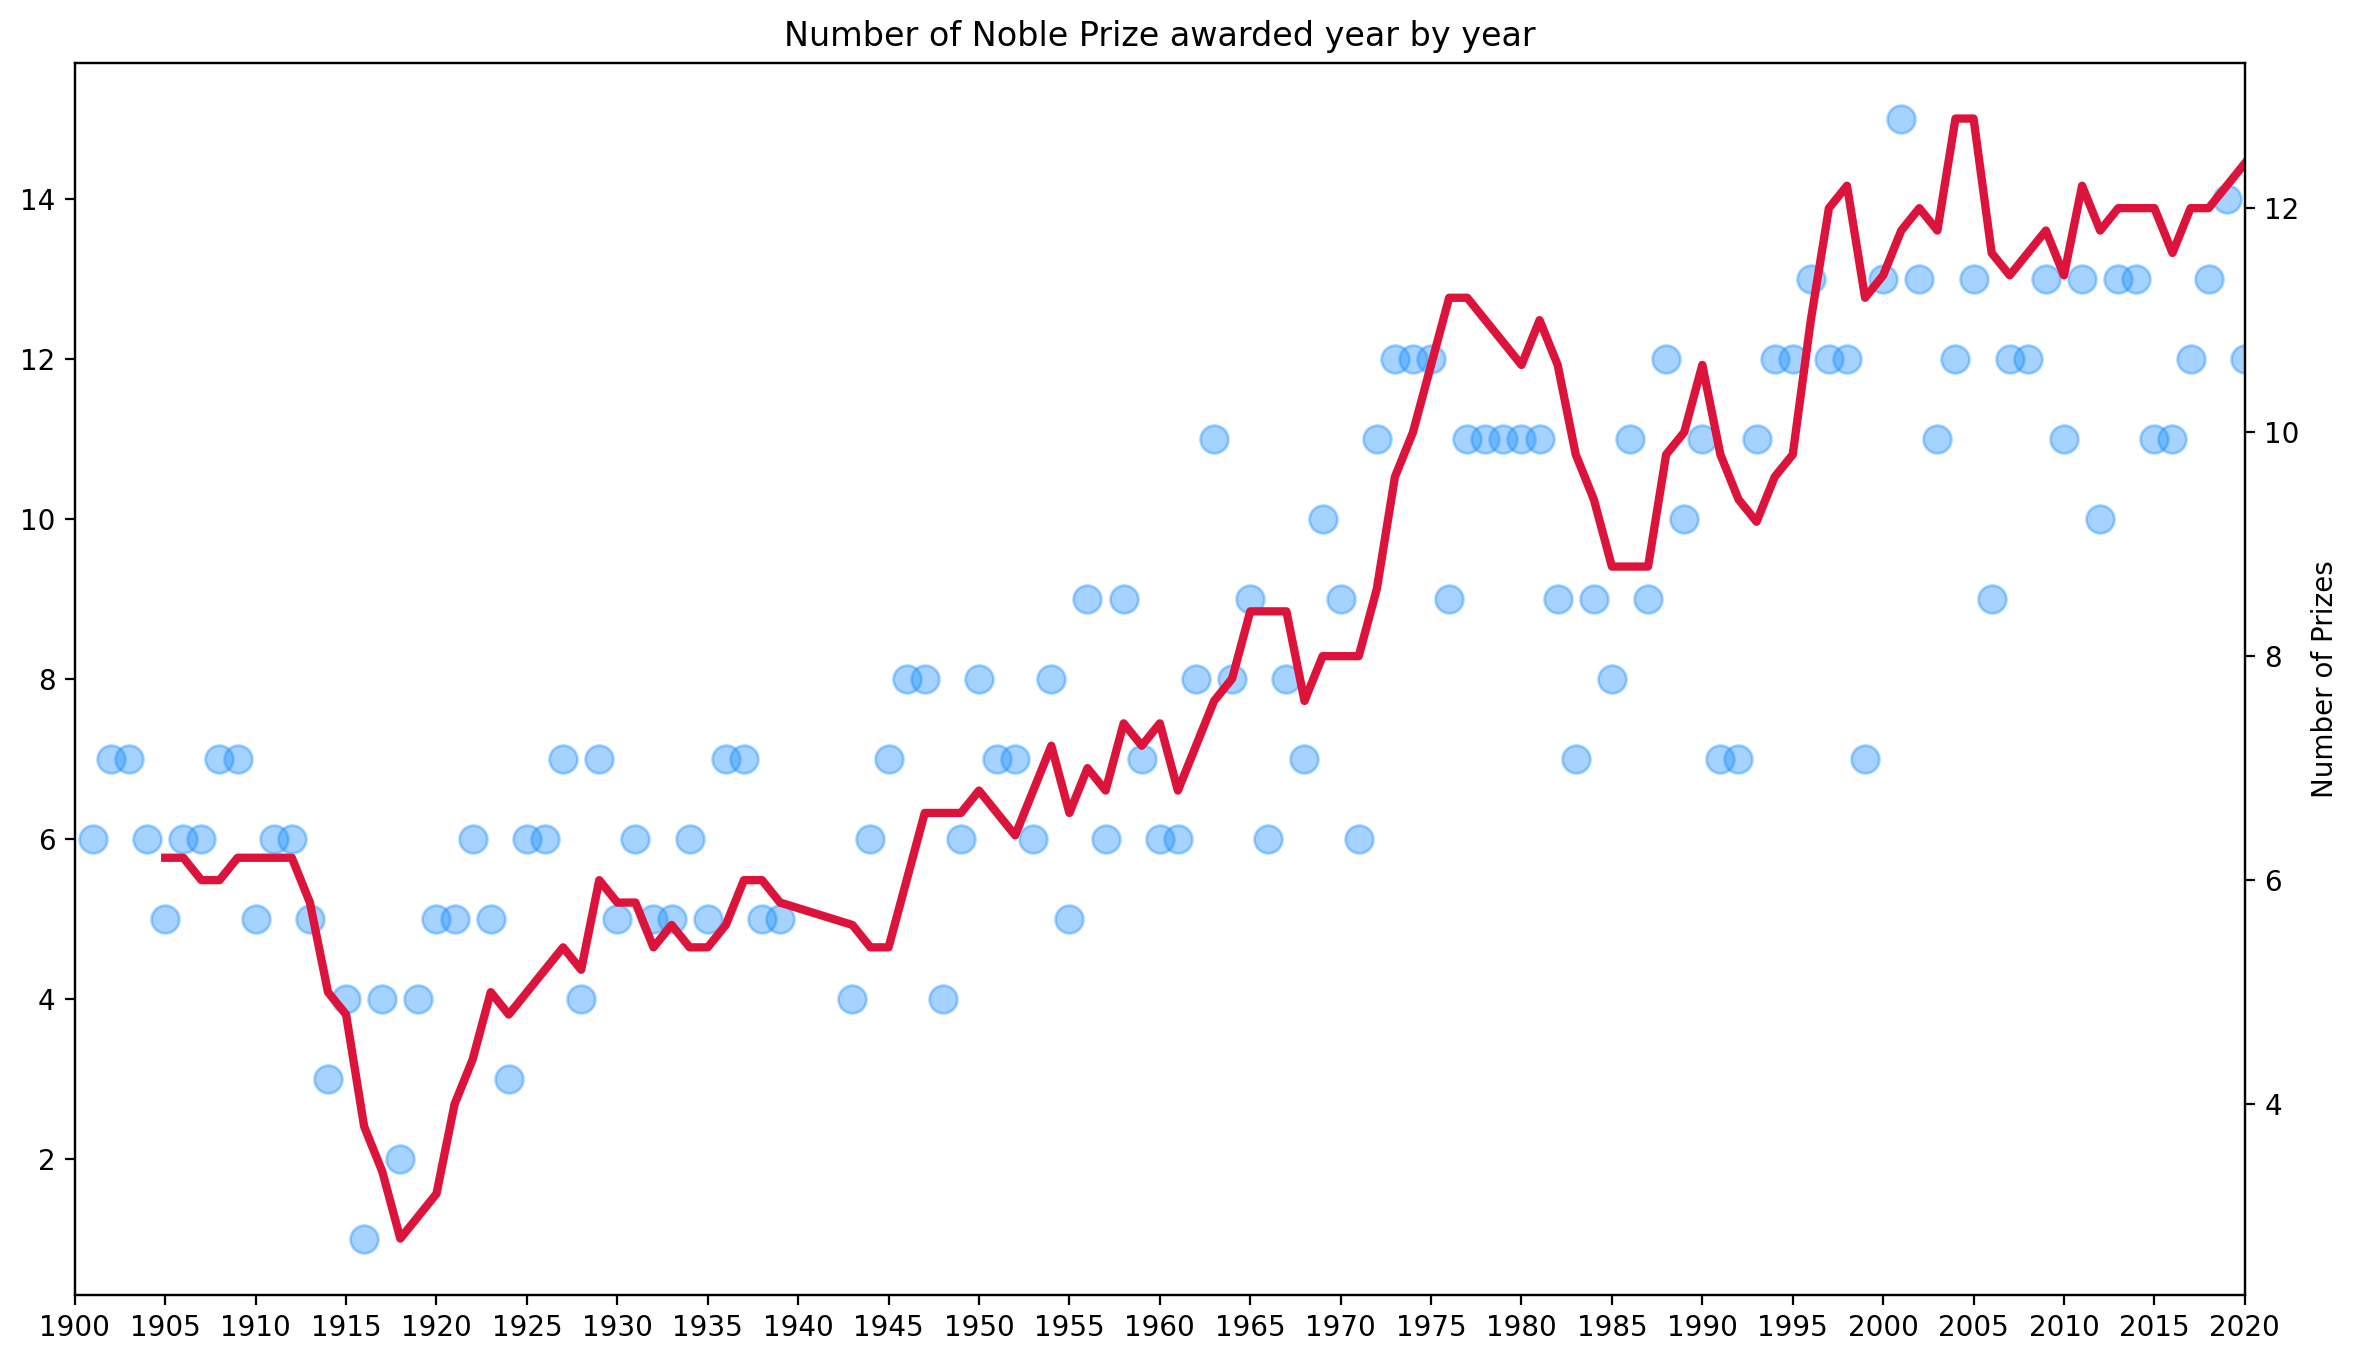

In [ ]:
five_years_gap = np.arange(start=1900, stop=(rolling_year_awards.index.max())+1, step=5)
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Number of Noble Prize awarded year by year")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.scatter(x=year_awards.index, y=year_awards.prize, color="dodgerblue", alpha=0.4, s=100)
ax2.plot(rolling_year_awards.index,
         rolling_year_awards.prize,
         color="crimson",
         linewidth=3)
ax2.set_ylabel("Number of Prizes")
plt.xticks(five_years_gap, rotation=45)
plt.xlim(1900, 2020)
plt.xlabel("Year")
plt.show()

In [ ]:
prizes_shared = df_data.groupby("year").agg({"share_pct": pd.Series.mean})
prizes_shared

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


In [ ]:
rolling_prize_shared = prizes_shared.rolling(window=5).mean()
rolling_prize_shared.dropna()

,share_pct
year,
1905,0.82
1906,0.82
1907,0.84
1908,0.84
1909,0.82
...,...
2016,0.52
2017,0.50
2018,0.50


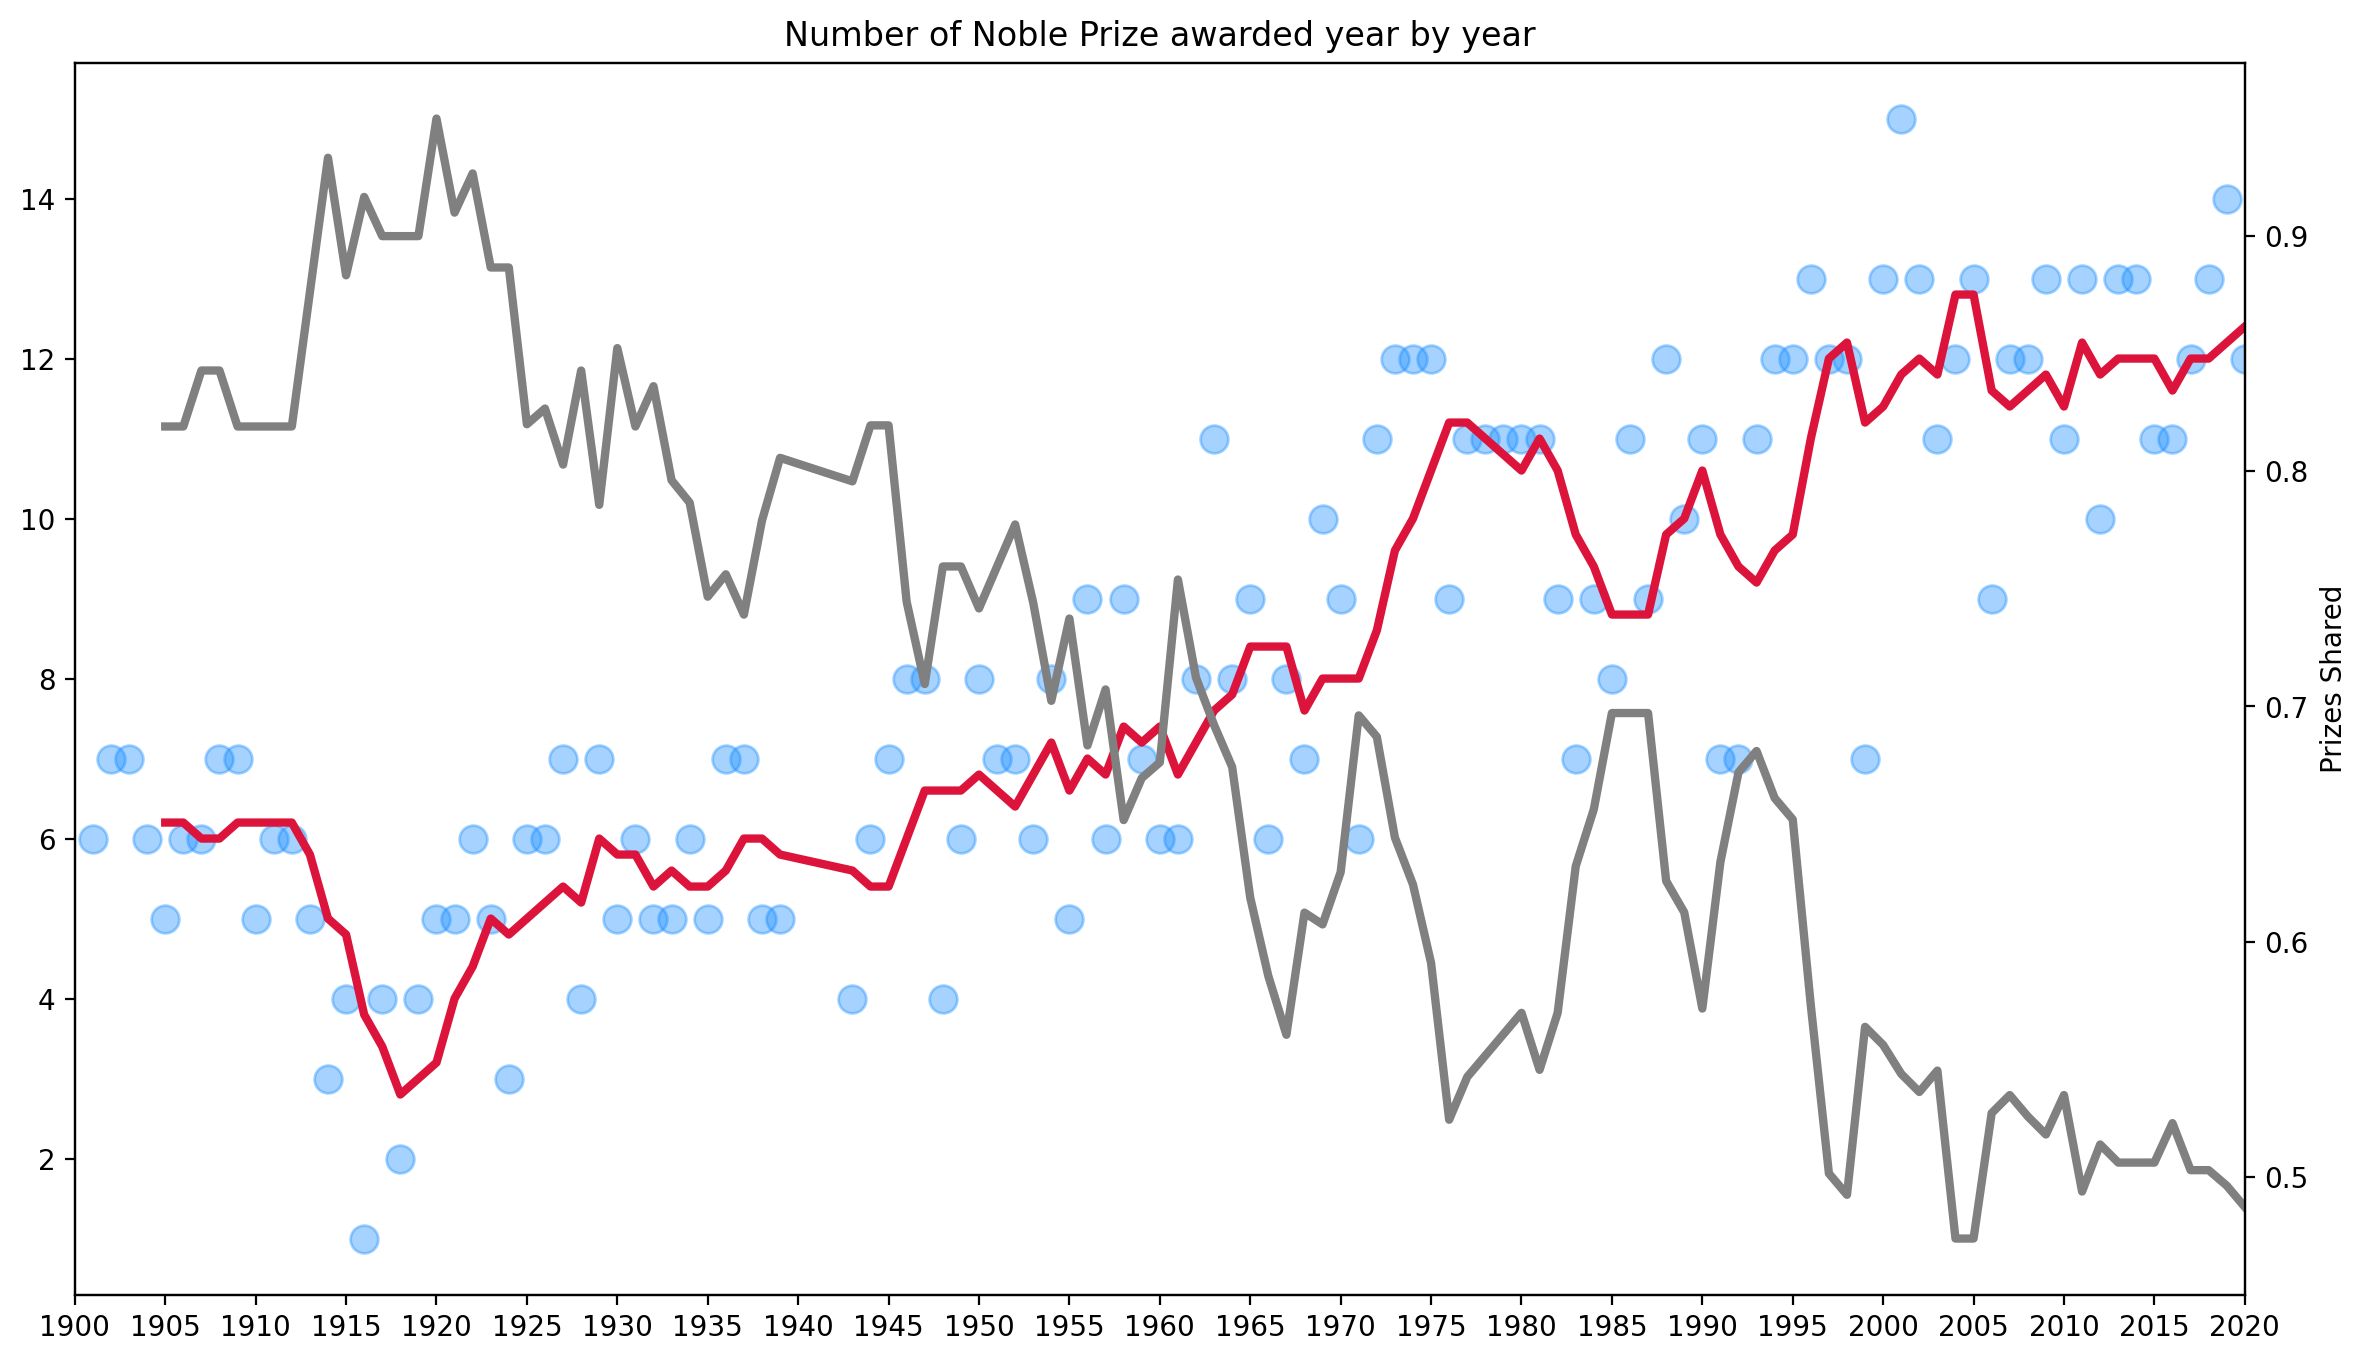

In [ ]:
five_years_gap = np.arange(start=1900, stop=(rolling_prize_shared.index.max())+1, step=5)
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Number of Noble Prize awarded year by year")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.scatter(x=year_awards.index, y=year_awards.prize, color="dodgerblue", alpha=0.4, s=100)
ax1.plot(rolling_year_awards.index,
         rolling_year_awards.prize,
         color="crimson",
         linewidth=3)
ax2.plot(rolling_prize_shared.index,
         rolling_prize_shared.share_pct,
         color="grey",
         linewidth=3)
ax2.set_ylabel("Prizes Shared")
plt.xticks(five_years_gap, rotation=45)
plt.xlim(1900, 2020)
plt.xlabel("Year")
plt.show()

# s=100, is used to set the size of data points.

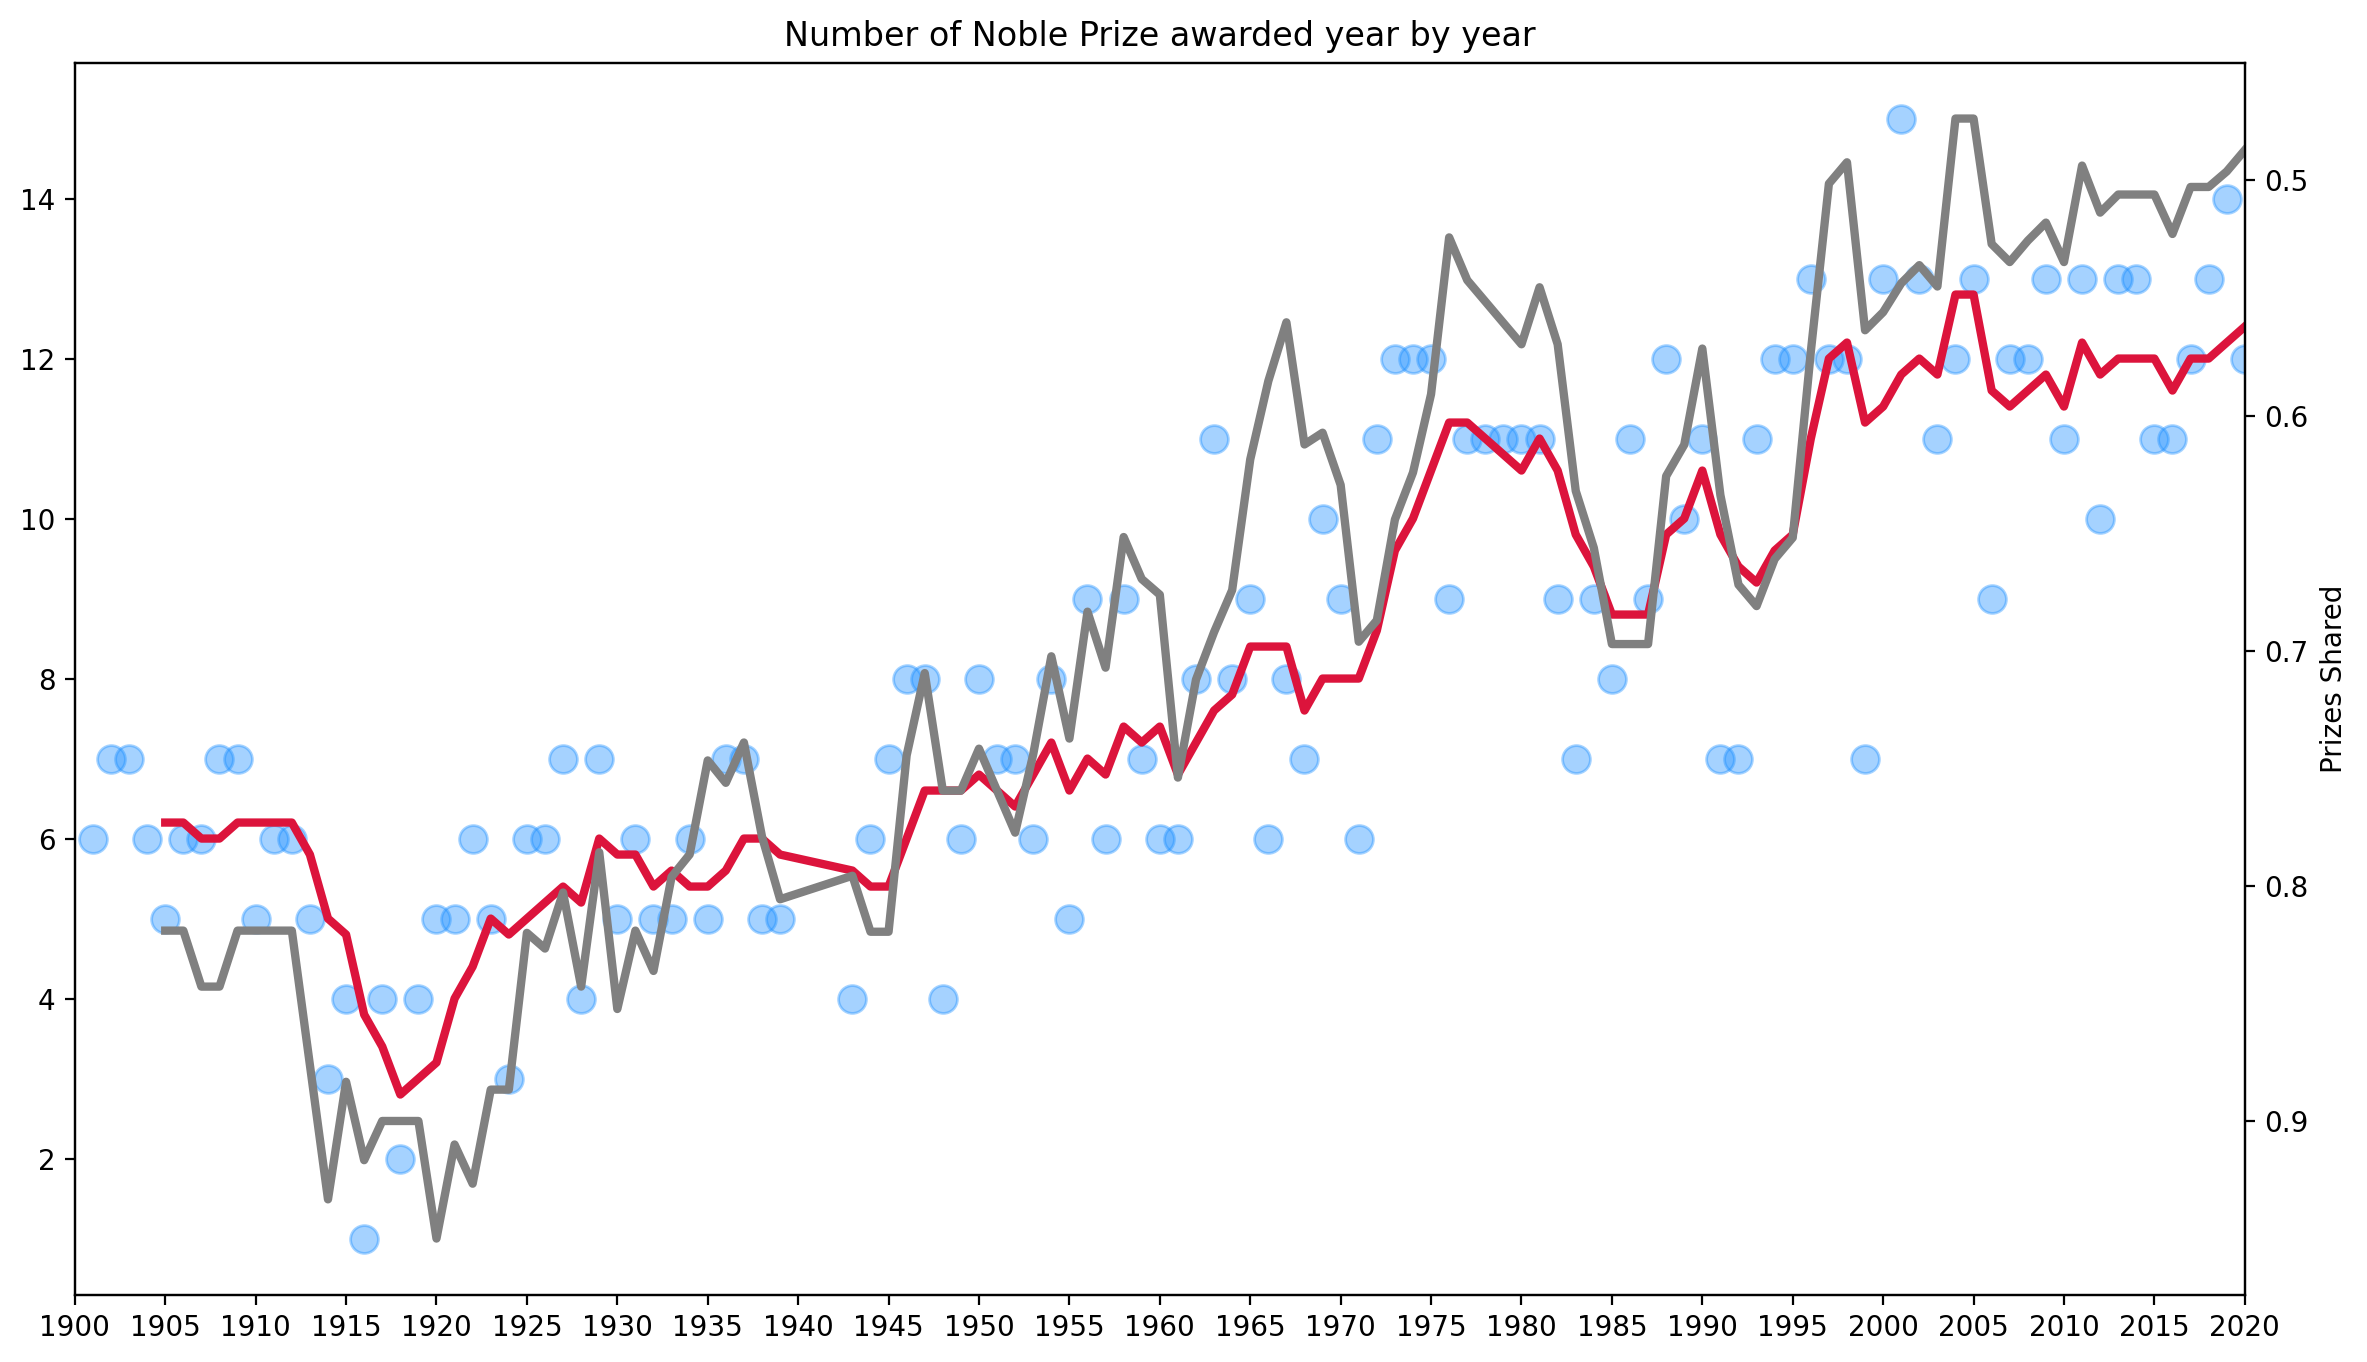

In [ ]:
five_years_gap = np.arange(start=1900, stop=(rolling_prize_shared.index.max())+1, step=5)
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Number of Noble Prize awarded year by year")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.scatter(x=year_awards.index, y=year_awards.prize, color="dodgerblue", alpha=0.4, s=100)
ax1.plot(rolling_year_awards.index,
         rolling_year_awards.prize,
         color="crimson",
         linewidth=3)
ax2.plot(rolling_prize_shared.index,
         rolling_prize_shared.share_pct,
         color="grey",
         linewidth=3)
ax2.invert_yaxis()
ax2.set_ylabel("Prizes Shared")
plt.xticks(five_years_gap, rotation=45)
plt.xlim(1900, 2020)
plt.xlabel("Year")
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [ ]:
countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).count()
top_countries = countries.sort_values("prize", ascending=False)[["birth_country_current", "prize"]]
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]
top20_countries

,birth_country_current,prize
33,India,9
31,Hungary,9
65,South Africa,9
2,Australia,10
54,Norway,12
13,China,12
20,Denmark,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [ ]:
# countries = df_data.groupby("birth_country", as_index=False).count()
# top20_countries = countries.sort_values("prize", ascending=False)[["birth_country", "prize"]][:20]
# top20_countries

In [ ]:
# countries = df_data.groupby("organization_country", as_index=False).count()
# top20_countries = countries.sort_values("prize", ascending=False)[["organization_country", "prize"]][:20]
# top20_countries

In [ ]:
h_bar = px.bar(x=top20_countries["prize"],
               y=top20_countries["birth_country_current"],
               orientation='h',
               color=top20_countries["prize"],
               color_continuous_scale='Viridis',
               title="Top 20 Countries by Number of Prizes")

h_bar.update_layout(xaxis_title="Number of Prizes",
                    yaxis_title="Country",
                    coloraxis_showscale=False)

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [ ]:
map = px.choropleth(locations=countries["ISO"],
                     color=countries["prize"],
                     hover_name=countries["birth_country_current"],
                     color_continuous_scale=px.colors.sequential.matter)
map.show()

# Here, locations parameter is set to "ISO", in order to associate the countries with the data.

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [ ]:
countries_category = df_data.groupby(["birth_country_current", "category"], as_index=False).count()[["birth_country_current", "category", "prize"]]
countries_category.rename(columns={'prize': 'cat_prize'}, inplace=True)
top20_countries_category = pd.merge(countries_category, top20_countries, on="birth_country_current")
top20_countries_category.rename(columns={'prize': 'total_prize'}, inplace=True)
top20_countries_category.sort_values("total_prize", ascending=False, inplace=True)
top20_countries_category

,birth_country_current,category,cat_prize,total_prize
108,United States of America,Physics,70,281
107,United States of America,Peace,19,281
106,United States of America,Medicine,78,281
105,United States of America,Literature,10,281
104,United States of America,Economics,49,281
...,...,...,...,...
46,India,Peace,1,9
45,India,Medicine,2,9
44,India,Literature,2,9
43,India,Economics,2,9


In [ ]:
plt.figure(figsize=(14, 8), dpi=200)
category_h_bar = px.bar(top20_countries_category,
                        x='total_prize',
                        y='birth_country_current',
                        color='category',
                        orientation='h',
                        title="Top 20 countries by Number of Prizes with Category")
category_h_bar.update_layout(xaxis_title="Number of Prizes",
                             yaxis_title="Country")
category_h_bar.show()

<Figure size 2800x1600 with 0 Axes>

In [ ]:
top20_countries_category.loc[(top20_countries_category["birth_country_current"] == "Japan") |
 (top20_countries_category["birth_country_current"] == "Germany") |
 (top20_countries_category["birth_country_current"] == "United States of America")]

,birth_country_current,category,cat_prize,total_prize
108,United States of America,Physics,70,281
107,United States of America,Peace,19,281
106,United States of America,Medicine,78,281
105,United States of America,Literature,10,281
104,United States of America,Economics,49,281
103,United States of America,Chemistry,55,281
36,Germany,Physics,26,84
33,Germany,Literature,8,84
34,Germany,Medicine,18,84
35,Germany,Peace,5,84


In [ ]:
top20_countries_category.loc[(top20_countries_category["birth_country_current"] == "Germany") |
                             (top20_countries_category["birth_country_current"] == "United Kingdom")]

,birth_country_current,category,cat_prize,total_prize
102,United Kingdom,Physics,24,105
101,United Kingdom,Peace,11,105
100,United Kingdom,Medicine,28,105
99,United Kingdom,Literature,7,105
98,United Kingdom,Economics,8,105
97,United Kingdom,Chemistry,27,105
36,Germany,Physics,26,84
33,Germany,Literature,8,84
34,Germany,Medicine,18,84
35,Germany,Peace,5,84


In [ ]:
top20_countries_category.loc[(top20_countries_category["birth_country_current"] == "Germany") |
                             (top20_countries_category["birth_country_current"] == "France")]

,birth_country_current,category,cat_prize,total_prize
36,Germany,Physics,26,84
33,Germany,Literature,8,84
34,Germany,Medicine,18,84
35,Germany,Peace,5,84
31,Germany,Chemistry,26,84
32,Germany,Economics,1,84
25,France,Chemistry,10,57
26,France,Economics,4,57
27,France,Literature,11,57
28,France,Medicine,12,57


In [ ]:
top20_countries_category.loc[(top20_countries_category["birth_country_current"] == "Australia")]

,birth_country_current,category,cat_prize,total_prize
2,Australia,Physics,2,10
0,Australia,Chemistry,1,10
1,Australia,Medicine,7,10


In [ ]:
top20_countries_category.loc[(top20_countries_category["birth_country_current"] == "Netherlands")]

,birth_country_current,category,cat_prize,total_prize
60,Netherlands,Economics,2,18
63,Netherlands,Physics,9,18
62,Netherlands,Peace,1,18
61,Netherlands,Medicine,2,18
59,Netherlands,Chemistry,4,18


In [ ]:
top20_countries_category.loc[(top20_countries_category["birth_country_current"] == "United States of America")]

,birth_country_current,category,cat_prize,total_prize
108,United States of America,Physics,70,281
107,United States of America,Peace,19,281
106,United States of America,Medicine,78,281
105,United States of America,Literature,10,281
104,United States of America,Economics,49,281
103,United States of America,Chemistry,55,281


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [ ]:
prizes_by_year = df_data.groupby(["birth_country_current", "year"], as_index=False).count()
prizes_by_year

,birth_country_current,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,Algeria,1957,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
1,Algeria,1997,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Argentina,1936,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
3,Argentina,1947,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Argentina,1980,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,United States of America,2020,7,7,7,7,7,7,7,7,7,7,6,6,6,7,7
623,Venezuela,1980,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
624,Vietnam,1973,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
625,Yemen,2011,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1


In [ ]:
prizes_by_year = prizes_by_year.sort_values("year")[["birth_country_current", "year", "prize"]]
prizes_by_year

,birth_country_current,year,prize
118,France,1901,2
346,Poland,1901,1
159,Germany,1901,1
312,Netherlands,1901,1
440,Switzerland,1901,1
...,...,...,...
31,Austria,2019,1
221,Germany,2020,1
622,United States of America,2020,7
533,United Kingdom,2020,2


In [ ]:
cumulative_prizes = prizes_by_year.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes
# Here, First, I group the data on the basis of "birth_day_current" and "year".
# Then, we apply sum() method on each grouped data formed.
# Then, with this operation, we get a new dataframe.
# On that dataframe, we again group the data on the basis of first level of index(lebel=[0]), i.e. birth_country_current.
# Then, applied cummulative sum on each grouped data.
# After it, I reset the index, means the index of the dataframe should now be turned to regular columns.

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
l_chart = px.line(cumulative_prizes,
                   x="year",
                   y="prize",
                   color="birth_country_current",
                   hover_name="birth_country_current")
l_chart.update_layout(xaxis_title="Year",
                      yaxis_title="Number of Prizes")
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [ ]:
data = df_data.groupby("organization_name", as_index=False).count()
organization_data = data[["organization_name", "prize"]]
organization_data.sort_values("prize", inplace=True)
top20_organization = organization_data[-20:]
top20_organization

<ipython-input-70-0717cdb77b5c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


In [ ]:
organization_bar = px.bar(top20_organization,
                          x="prize",
                          y="organization_name",
                          color="prize",
                          color_continuous_scale="viridis",
                          orientation="h",
                          title="Top 20 Research Institutions by Number of Prizes")

organization_bar.update_layout(xaxis_title="Number of Prizes",
                               yaxis_title="Institution",
                               coloraxis_showscale=False)
organization_bar.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [ ]:
data = df_data.groupby("organization_city", as_index=False).count()
organization_data = data.sort_values("prize")[["organization_city", "prize"]]
top20_organization_city = organization_data[-20:]
top20_organization_city

,organization_city,prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


In [ ]:
organization_city_bar = px.bar(top20_organization_city,
                          x="prize",
                          y="organization_city",
                          color="prize",
                          color_continuous_scale="viridis",
                          orientation="h",
                          title="Top 20 Cities by Number of Prizes")

organization_city_bar.update_layout(xaxis_title="Number of Prizes",
                               yaxis_title="Institution City",
                               coloraxis_showscale=False)
organization_city_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [ ]:
data = df_data.groupby("birth_city", as_index=False).count()
city_data = data.sort_values("prize")[["birth_city", "prize"]]
top20_birth_city = city_data[-20:]
top20_birth_city

,birth_city,prize
343,"Milwaukee, WI",3
87,Cairo,4
356,Montreal,4
428,"Pittsburgh, PA",4
167,Frankfurt-on-the-Main,5
440,Prague,5
515,Stockholm,6
210,Hamburg,6
363,Munich,7
358,Moscow,7


In [ ]:
birth_city_bar = px.bar(top20_birth_city,
                          x="prize",
                          y="birth_city",
                          color="prize",
                          color_continuous_scale="plasma",
                          orientation="h",
                          title="Top 20 Birth Cities by Number of Prizes")

birth_city_bar.update_layout(xaxis_title="Number of Prizes",
                               yaxis_title="Birth City",
                               coloraxis_showscale=False)
birth_city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [ ]:
organization_big_data = df_data.groupby(["organization_country", "organization_city", "organization_name"], as_index=False).count()
organization_big_data = organization_big_data.sort_values("prize")[["organization_country", "organization_city", "organization_name", "prize"]]
organization_big_data

,organization_country,organization_city,organization_name,prize
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
154,United Kingdom,Birmingham,Birmingham University,1
155,United Kingdom,Bodmin,Glynn Research Laboratories,1
157,United Kingdom,Bristol,Bristol University,1
158,United Kingdom,Bucksburn (Scotland),Rowett Research Institute,1
...,...,...,...,...
195,United States of America,"Berkeley, CA",University of California,19
209,United States of America,"Chicago, IL",University of Chicago,20
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
280,United States of America,"Stanford, CA",Stanford University,23


In [ ]:
sunburst = px.sunburst(organization_big_data,
                       path=["organization_country", "organization_city", "organization_name"],
                       values='prize',
                       color='organization_country',
                       title="Where do Discoveries take place?")

sunburst.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City',
                       coloraxis_showscale=False)
sunburst.show()

# Here, the first circle represents the countries.
# Then, the proportion covered by a specific country, beyond of that proportion represents its cities.
# same logic applies to the universities or research institutions under a city.

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [ ]:
birth_year = df_data['birth_date'].dt.year
# Here, I've used ".dt accessor" to access the datetime property "year" of datetime object.
birth_year = pd.to_numeric(birth_year)
df_data["winning_age"] = df_data["year"] - birth_year
df_data["winning_age"] = df_data["winning_age"].fillna(0).astype(int)
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33,71
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25,55
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25,68


### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [ ]:
noble_laureate_drop_na = df_data[df_data["winning_age"] != 0]
youngest_winner = noble_laureate_drop_na["winning_age"].idxmin()
oldest_winner = noble_laureate_drop_na["winning_age"].idxmax()
print(f"The youngest Noble laureate winner is {df_data.iloc[(youngest_winner)]['full_name']}")
print(f"The oldest Noble laureate winner is {df_data.iloc[(oldest_winner)]['full_name']}")
# Here, idxmin() and idxmax() give us index of minimum and maximum respectively.
# Then, I applied the indices on df_data.
oldest_winner = noble_laureate_drop_na["winning_age"].idxmax()

The youngest Noble laureate winner is Malala Yousafzai
The oldest Noble laureate winner is John Goodenough


In [ ]:
print(f"The youngest Noble laureate winner is {df_data.iloc[(youngest_winner)]['full_name']} {df_data.iloc[(youngest_winner)]['motivation']}")
print(f"The oldest Noble laureate winner is {df_data.iloc[(oldest_winner)]['full_name']} {df_data.iloc[(oldest_winner)]['motivation']}")

The youngest Noble laureate winner is Malala Yousafzai "for their struggle against the suppression of children and young people and for the right of all children to education"
The oldest Noble laureate winner is John Goodenough “for the development of lithium-ion batteries”


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [ ]:
noble_laureate_drop_na["winning_age"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

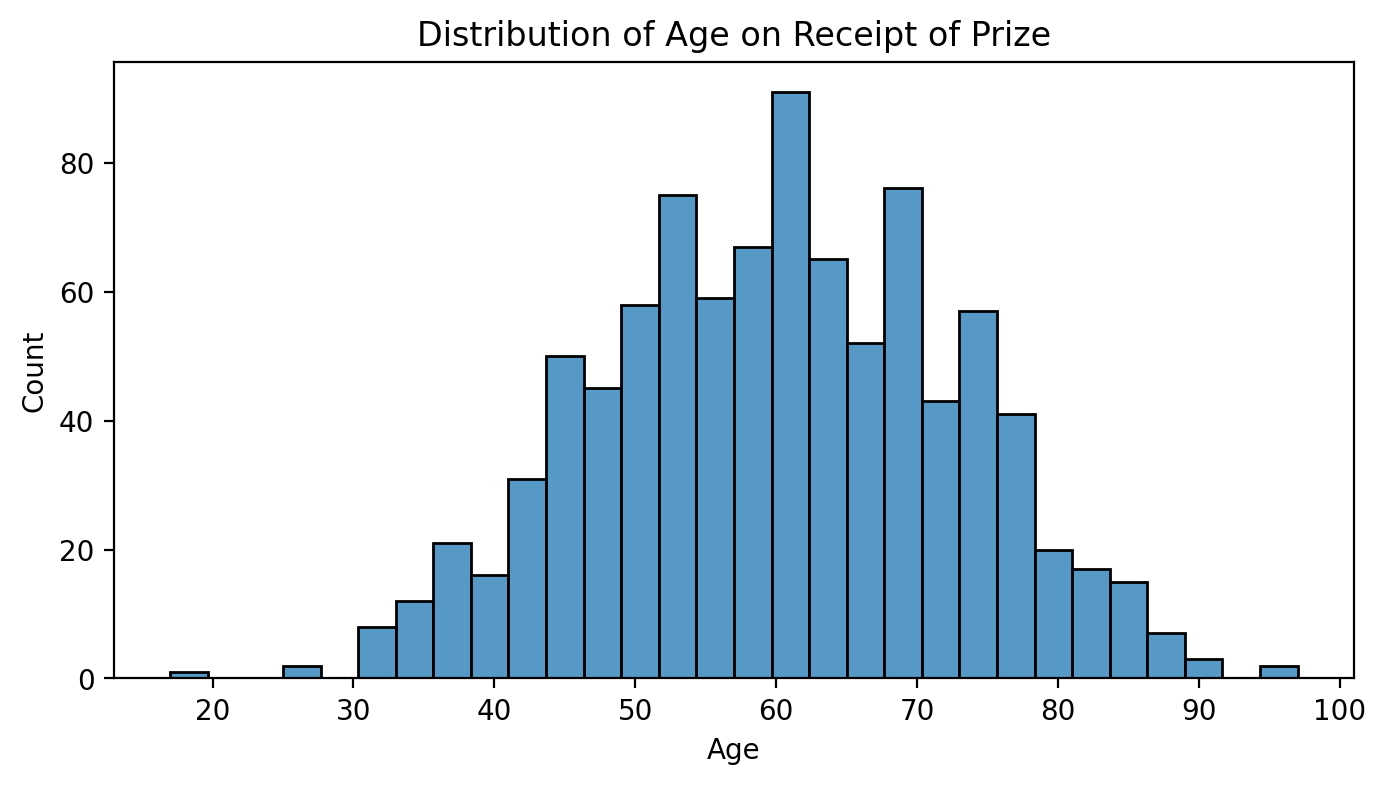

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=noble_laureate_drop_na,
             x='winning_age', bins=30)
plt.xlabel("Age")
plt.title('Distribution of Age on Receipt of Prize')
plt.show()
# Here, bins represent the number of bin(distribution) on the histogram chart.
# 'winning_age' providing the data on the x-axis.
# The histogram is representing the distribution of Noble Prize on the basis of Noble laureates's age when they won the prize.
# y-axis represents the count(Number of prizes awarded) at age.
# For example:- between 30 and 40 age, near around close to 40 Noble Prizes were given.
# The most Noble Prizes were awarded between 60 and 70.
# As, you increase the number of bins, the distributions will be increased and the more doubts shall be cleared.

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


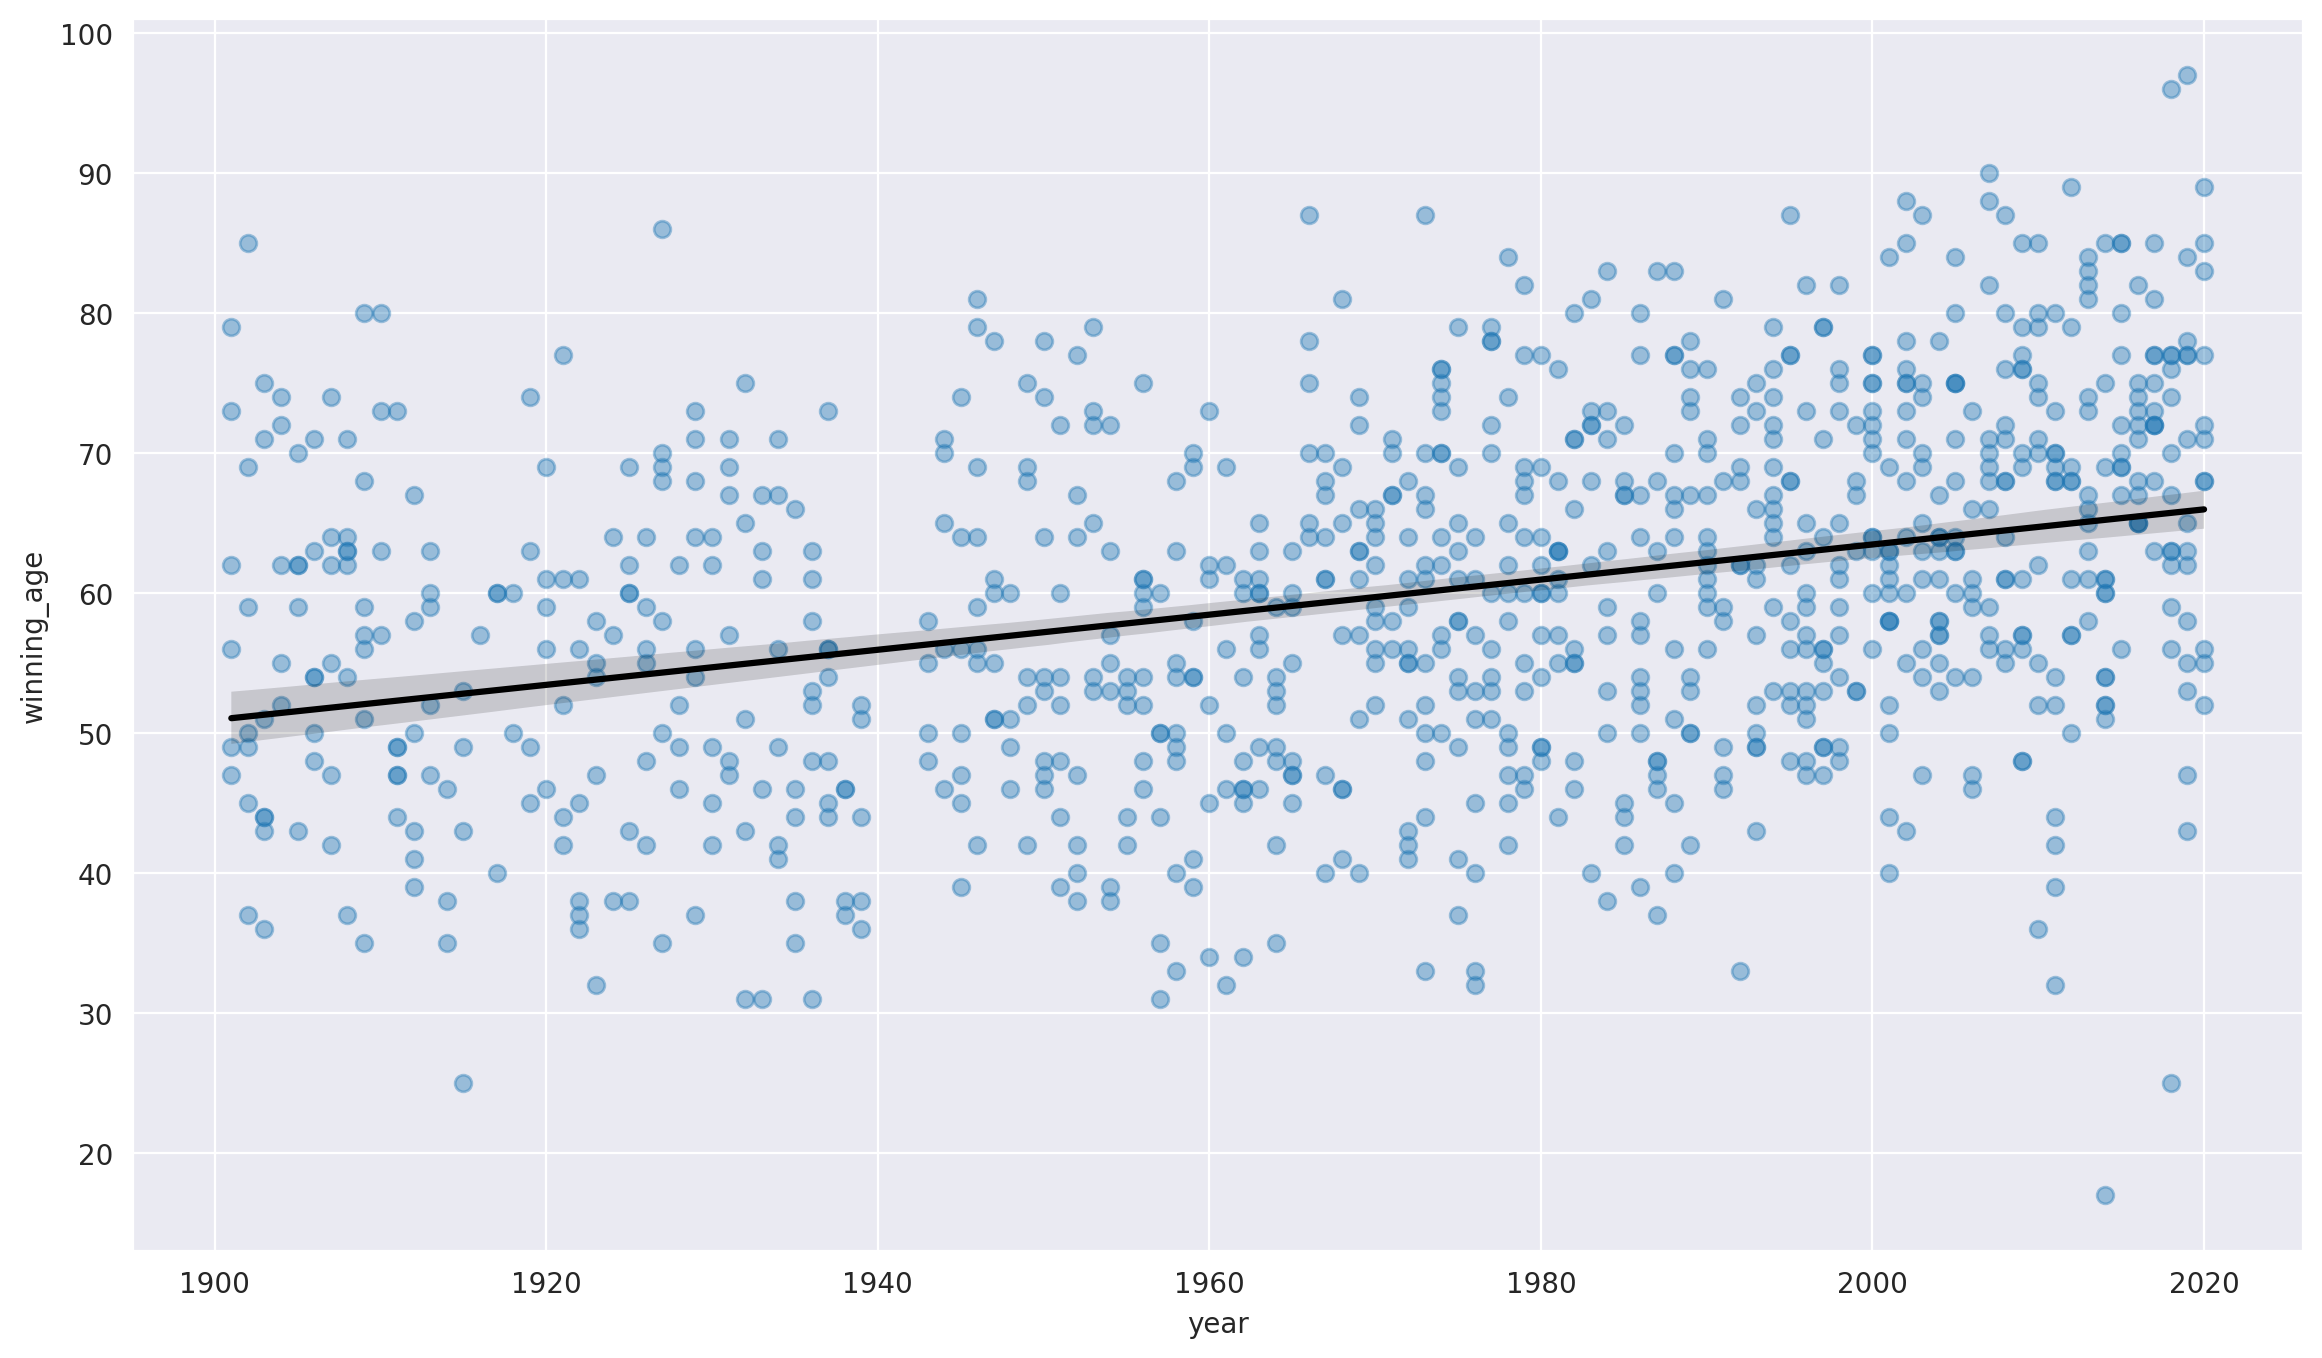

In [ ]:
plt.figure(figsize=(14, 8), dpi=200)
with sns.axes_style("darkgrid"):
  sns.regplot(noble_laureate_drop_na,
              x='year',
              y='winning_age',
              scatter_kws={'alpha': 0.4},
              line_kws={'color': 'black'})

# Here, regplot() creates a regression line(best fit line) that describes the relationship
# between dependent variable(winning_age) and independent variable(year) in the best possible way.
# Here, we have plot a regression line that describes the relationship between year(independent variable) and
# winning_age(dependent variable), trying to predict the age of the next noble laureate of upcoming years.

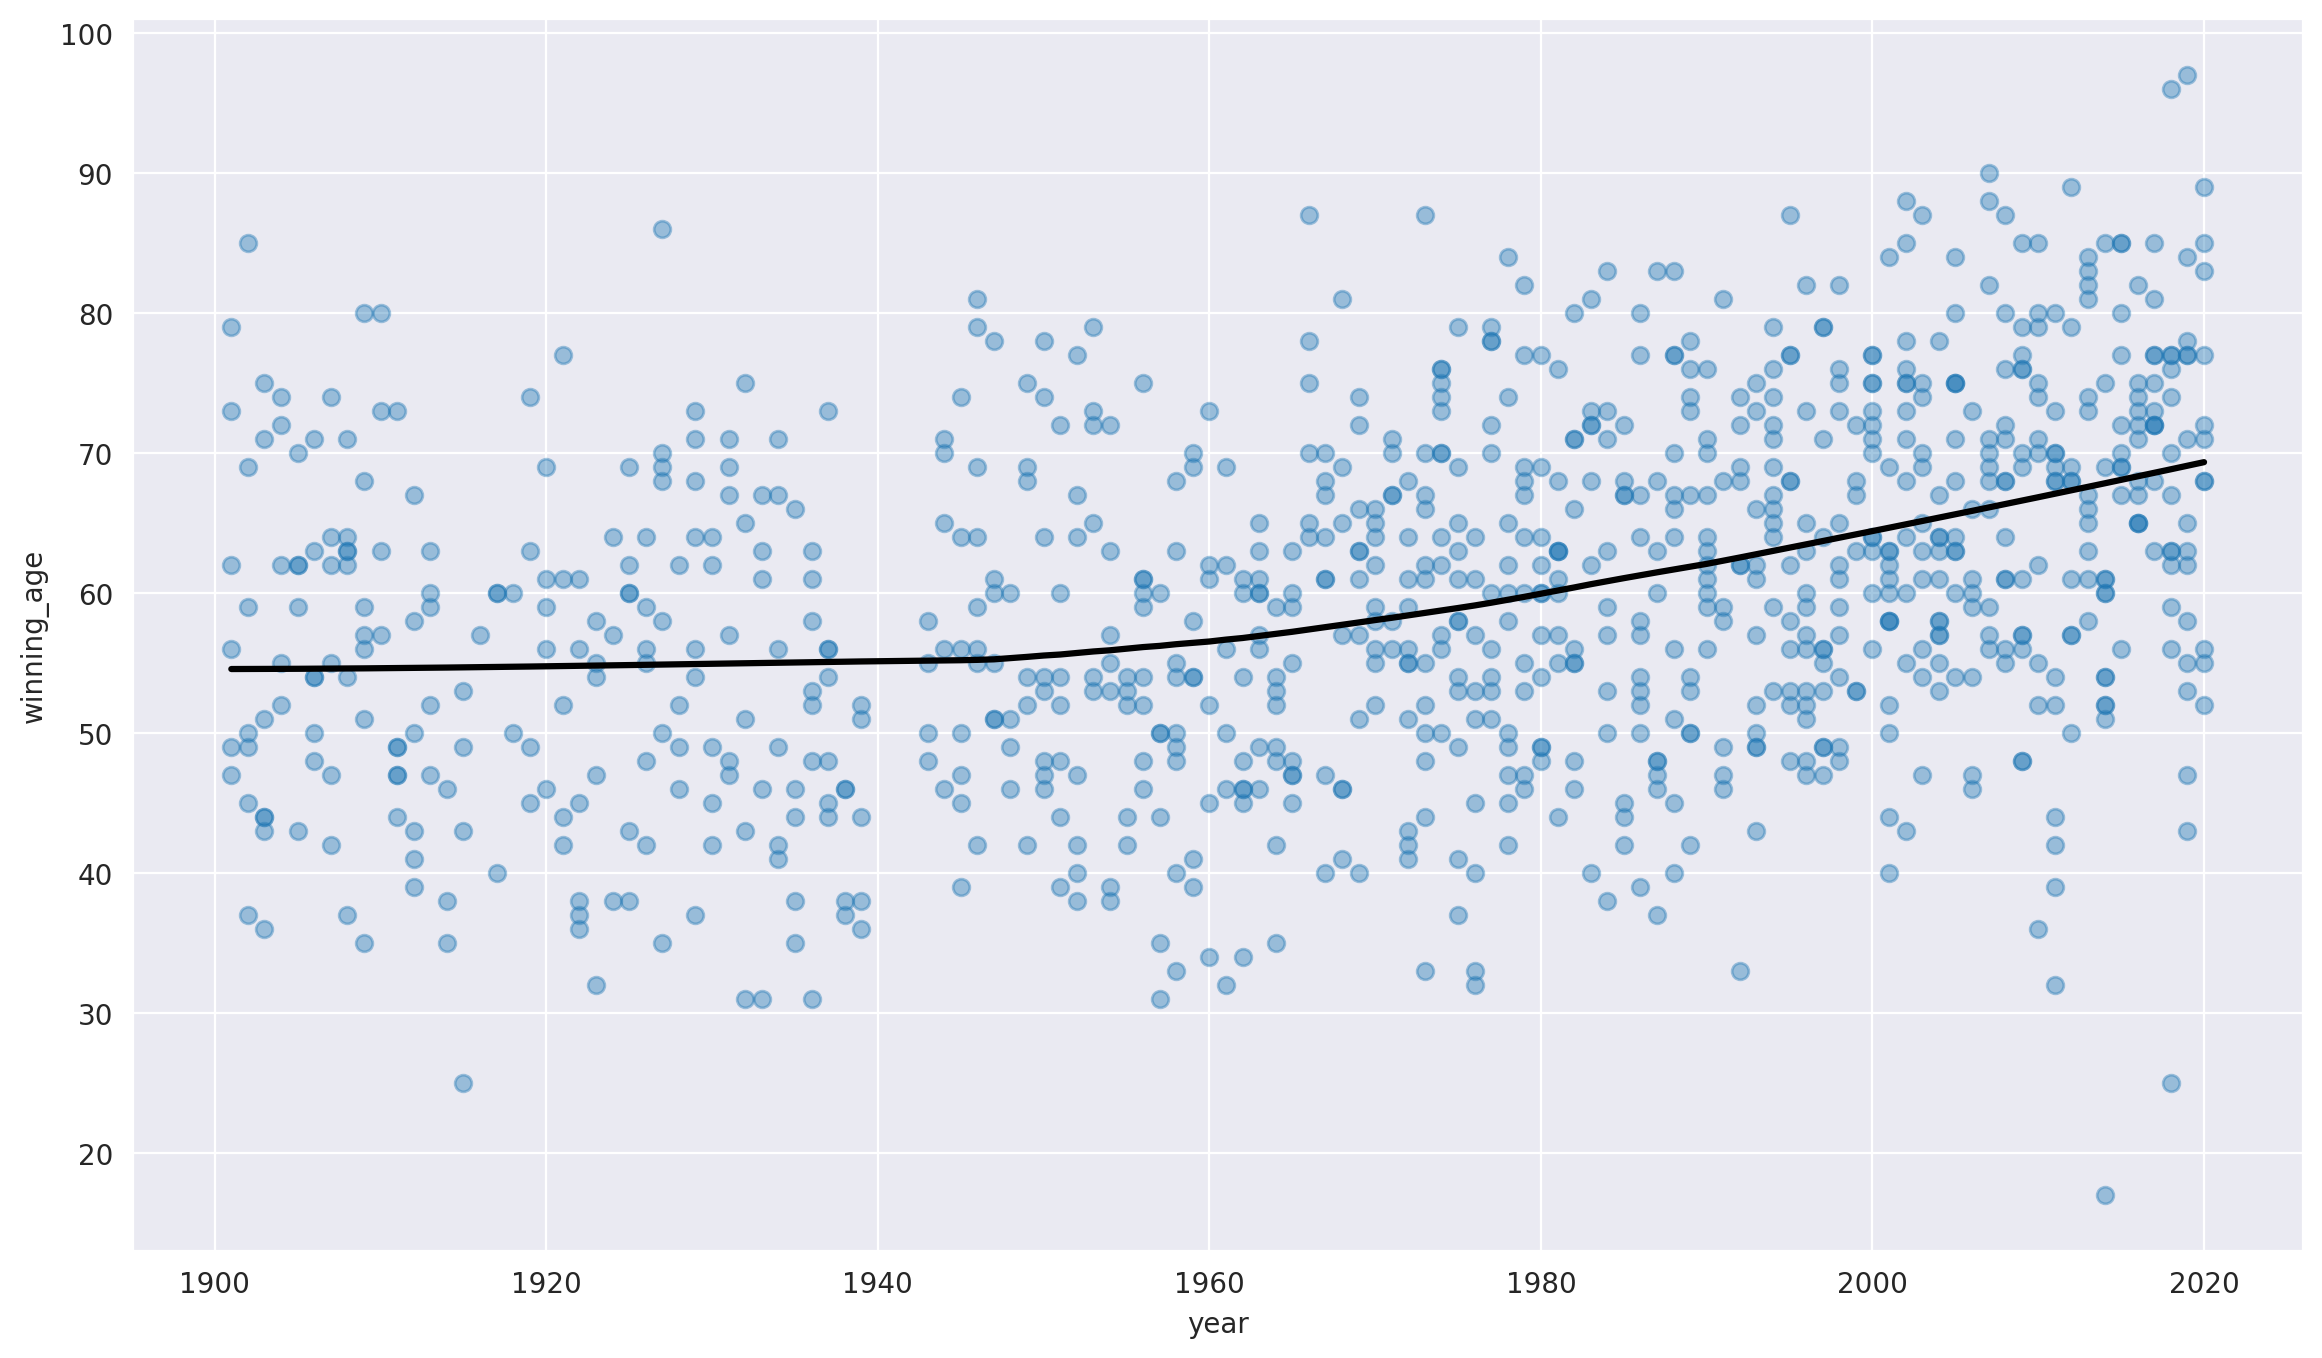

In [ ]:
plt.figure(figsize=(14, 8), dpi=200)
with sns.axes_style("darkgrid"):
  sns.regplot(noble_laureate_drop_na,
              x='year',
              y='winning_age',
              scatter_kws={'alpha': 0.4},
              line_kws={'color': 'black'},
              lowess=True)


# lowess=True, is creating a smoothed regression line which is helpful for us more than a regression line.
# As, it helps us to know about the trends in data points and it is following and adapting to the local data points.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [ ]:
category_df_data = noble_laureate_drop_na.groupby(["category", "winning_age"], as_index=False).agg({'prize': pd.Series.count})
category_df_data = category_df_data[["category", "winning_age", "prize"]]
category_df_data

,category,winning_age,prize
0,Chemistry,35,1
1,Chemistry,36,1
2,Chemistry,37,1
3,Chemistry,38,3
4,Chemistry,39,1
...,...,...,...
270,Physics,85,3
271,Physics,87,2
272,Physics,88,1
273,Physics,89,1


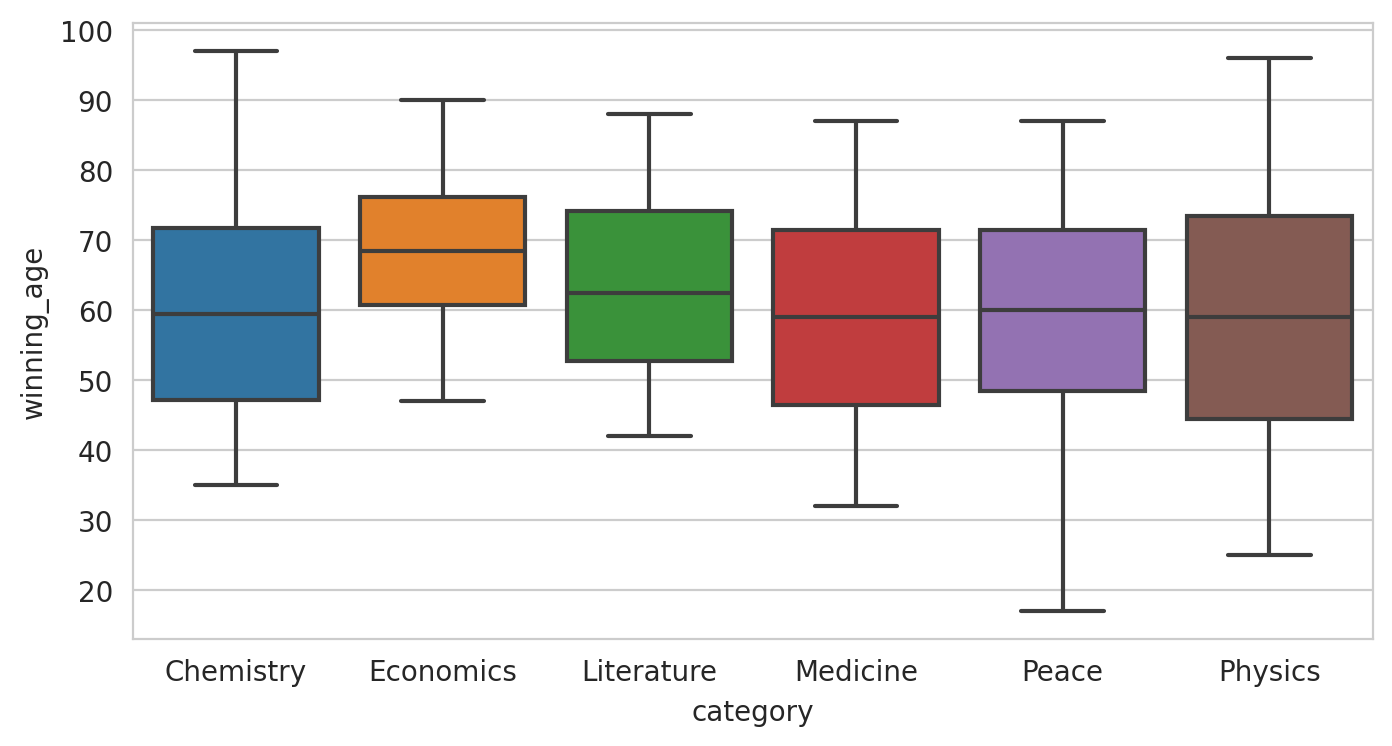

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.boxplot(category_df_data,
            x='category',
            y='winning_age')

plt.show()

# Here, we are extracting statistical info about Noble Laureates's age of each category.
# It gives us mean, quartiles, min and max values of each category.

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


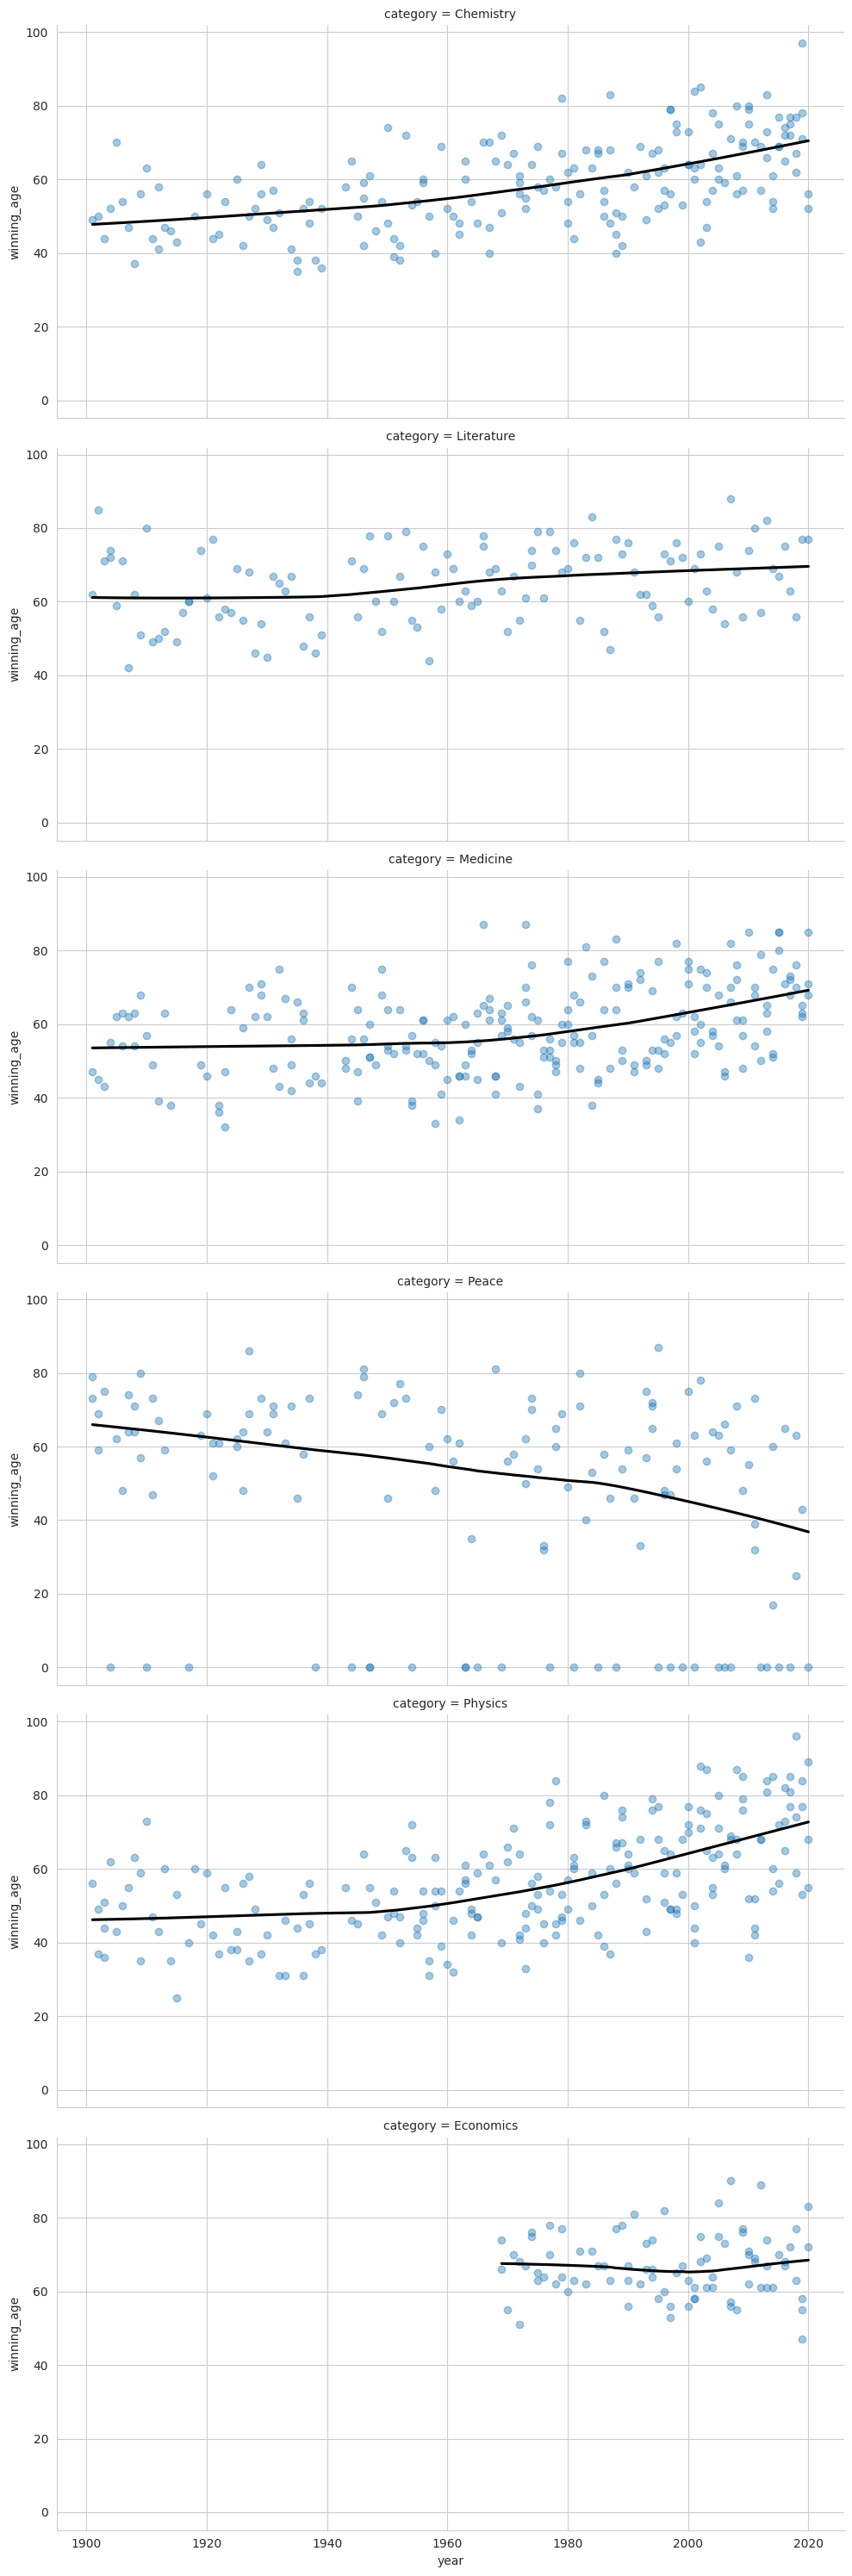

In [ ]:
with sns.axes_style("whitegrid"):
  sns.lmplot(data=df_data,
            x="year",
            y="winning_age",
            row="category",
            lowess=True,
            aspect=2,
            scatter_kws= {'alpha': 0.4},
            line_kws={'color': 'black'})

plt.show()
# lmplot() is used to create a scatter plot along with the regression line.
# In this plot chart, we are tracking in what amount, changes come up on the Ages of Noble laureates in each category.
# aspect=2 parametes is used to set the wider aspect ratio of the plot.

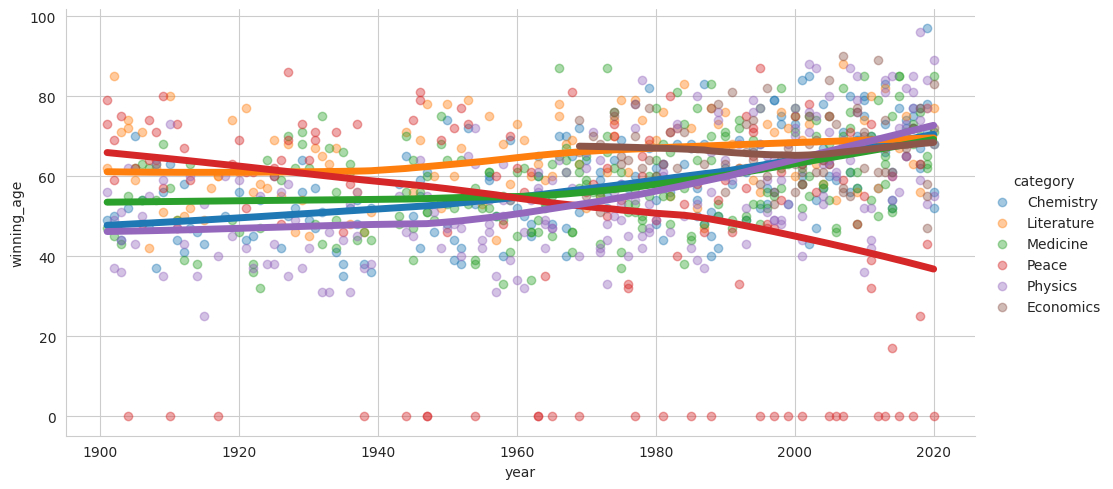

In [ ]:
with sns.axes_style("whitegrid"):
  sns.lmplot(data=df_data,
            x="year",
            y="winning_age",
            hue="category",
            lowess=True,
            aspect=2,
            scatter_kws= {'alpha': 0.4},
            line_kws={'linewidth': 5})

plt.show()
# Here, hue parameter is used to set the color of data points based on the categories.